In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch

In [2]:
df=pd.read_csv('Alcohol_Sales.csv',index_col=0,parse_dates=True)

In [3]:
df

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


In [4]:
df.dropna(inplace=True)

In [5]:
df

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


<AxesSubplot:xlabel='DATE'>

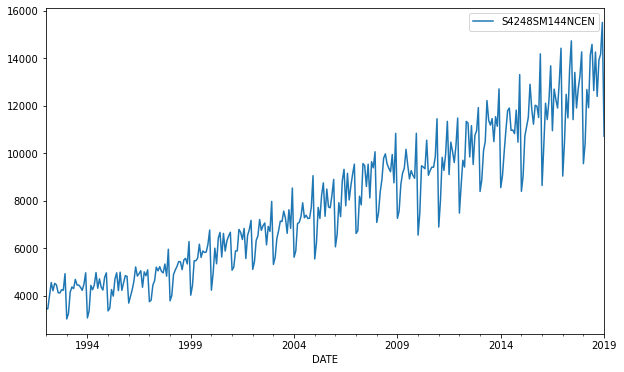

In [6]:

df.plot(figsize=(10,6))

In [7]:
df.describe()

,S4248SM144NCEN
count,325.000000
mean,7886.400000
std,2914.269061
min,3031.000000
25%,5231.000000
50%,7481.000000
75%,9977.000000
max,15504.000000


In [8]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [9]:
y=df['S4248SM144NCEN'].values

In [10]:
y

array([ 3459,  3458,  4002,  4564,  4221,  4529,  4466,  4137,  4126,
        4259,  4240,  4936,  3031,  3261,  4160,  4377,  4307,  4696,
        4458,  4457,  4364,  4236,  4500,  4974,  3075,  3377,  4443,
        4261,  4460,  4985,  4324,  4719,  4374,  4248,  4784,  4971,
        3370,  3484,  4269,  3994,  4715,  4974,  4223,  5000,  4235,
        4554,  4851,  4826,  3699,  3983,  4262,  4619,  5219,  4836,
        4941,  5062,  4365,  5012,  4850,  5097,  3758,  3825,  4454,
        4635,  5210,  5057,  5231,  5034,  4970,  5342,  4831,  5965,
        3796,  4019,  4898,  5090,  5237,  5447,  5435,  5107,  5515,
        5583,  5346,  6286,  4032,  4435,  5479,  5483,  5587,  6176,
        5621,  5889,  5828,  5849,  6180,  6771,  4243,  4952,  6008,
        5353,  6435,  6673,  5636,  6630,  5887,  6322,  6520,  6678,
        5082,  5216,  5893,  5894,  6799,  6667,  6374,  6840,  5575,
        6545,  6789,  7180,  5117,  5442,  6337,  6525,  7216,  6761,
        6958,  7070,

In [11]:
test_data=y[-12:]

In [12]:
test_data

array([10415, 12683, 11919, 14138, 14583, 12640, 14257, 12396, 13914,
       14174, 15504, 10718], dtype=int64)

In [13]:
train_set=y[:-12]

In [14]:
train_set

array([ 3459,  3458,  4002,  4564,  4221,  4529,  4466,  4137,  4126,
        4259,  4240,  4936,  3031,  3261,  4160,  4377,  4307,  4696,
        4458,  4457,  4364,  4236,  4500,  4974,  3075,  3377,  4443,
        4261,  4460,  4985,  4324,  4719,  4374,  4248,  4784,  4971,
        3370,  3484,  4269,  3994,  4715,  4974,  4223,  5000,  4235,
        4554,  4851,  4826,  3699,  3983,  4262,  4619,  5219,  4836,
        4941,  5062,  4365,  5012,  4850,  5097,  3758,  3825,  4454,
        4635,  5210,  5057,  5231,  5034,  4970,  5342,  4831,  5965,
        3796,  4019,  4898,  5090,  5237,  5447,  5435,  5107,  5515,
        5583,  5346,  6286,  4032,  4435,  5479,  5483,  5587,  6176,
        5621,  5889,  5828,  5849,  6180,  6771,  4243,  4952,  6008,
        5353,  6435,  6673,  5636,  6630,  5887,  6322,  6520,  6678,
        5082,  5216,  5893,  5894,  6799,  6667,  6374,  6840,  5575,
        6545,  6789,  7180,  5117,  5442,  6337,  6525,  7216,  6761,
        6958,  7070,

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler=MinMaxScaler(feature_range=(-1,1))

In [17]:
train=scaler.fit(train_set.reshape(-1,1))

In [18]:
train=scaler.transform(train_set.reshape(-1,1))

In [19]:
train

array([[-0.92683135],
       [-0.92700231],
       [-0.83400291],
       [-0.73792632],
       [-0.79656381],
       [-0.74390974],
       [-0.75467989],
       [-0.81092401],
       [-0.81280451],
       [-0.79006753],
       [-0.79331567],
       [-0.67433114],
       [-1.        ],
       [-0.9606804 ],
       [-0.80699205],
       [-0.76989486],
       [-0.7818617 ],
       [-0.71536029],
       [-0.75604753],
       [-0.75621848],
       [-0.77211727],
       [-0.79399949],
       [-0.74886742],
       [-0.66783486],
       [-0.99247799],
       [-0.94084965],
       [-0.75861185],
       [-0.78972562],
       [-0.75570562],
       [-0.66595436],
       [-0.77895547],
       [-0.71142833],
       [-0.77040773],
       [-0.79194803],
       [-0.70031627],
       [-0.66834772],
       [-0.94204633],
       [-0.92255748],
       [-0.78835798],
       [-0.83537054],
       [-0.71211215],
       [-0.66783486],
       [-0.7962219 ],
       [-0.66339003],
       [-0.79417044],
       [-0

In [20]:
train=torch.FloatTensor(train)

In [21]:
train

tensor([[-0.9268],
        [-0.9270],
        [-0.8340],
        [-0.7379],
        [-0.7966],
        [-0.7439],
        [-0.7547],
        [-0.8109],
        [-0.8128],
        [-0.7901],
        [-0.7933],
        [-0.6743],
        [-1.0000],
        [-0.9607],
        [-0.8070],
        [-0.7699],
        [-0.7819],
        [-0.7154],
        [-0.7560],
        [-0.7562],
        [-0.7721],
        [-0.7940],
        [-0.7489],
        [-0.6678],
        [-0.9925],
        [-0.9408],
        [-0.7586],
        [-0.7897],
        [-0.7557],
        [-0.6660],
        [-0.7790],
        [-0.7114],
        [-0.7704],
        [-0.7919],
        [-0.7003],
        [-0.6683],
        [-0.9420],
        [-0.9226],
        [-0.7884],
        [-0.8354],
        [-0.7121],
        [-0.6678],
        [-0.7962],
        [-0.6634],
        [-0.7942],
        [-0.7396],
        [-0.6889],
        [-0.6931],
        [-0.8858],
        [-0.8373],
        [-0.7896],
        [-0.7285],
        [-0.

In [22]:
train=train.view(-1)

In [23]:
train

tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
        -0.8128, -0.7901, -0.7933, -0.6743, -1.0000, -0.9607, -0.8070, -0.7699,
        -0.7819, -0.7154, -0.7560, -0.7562, -0.7721, -0.7940, -0.7489, -0.6678,
        -0.9925, -0.9408, -0.7586, -0.7897, -0.7557, -0.6660, -0.7790, -0.7114,
        -0.7704, -0.7919, -0.7003, -0.6683, -0.9420, -0.9226, -0.7884, -0.8354,
        -0.7121, -0.6678, -0.7962, -0.6634, -0.7942, -0.7396, -0.6889, -0.6931,
        -0.8858, -0.8373, -0.7896, -0.7285, -0.6260, -0.6914, -0.6735, -0.6528,
        -0.7719, -0.6613, -0.6890, -0.6468, -0.8757, -0.8643, -0.7567, -0.7258,
        -0.6275, -0.6536, -0.6239, -0.6576, -0.6685, -0.6049, -0.6923, -0.4984,
        -0.8692, -0.8311, -0.6808, -0.6480, -0.6229, -0.5870, -0.5890, -0.6451,
        -0.5753, -0.5637, -0.6042, -0.4435, -0.8289, -0.7600, -0.5815, -0.5808,
        -0.5630, -0.4623, -0.5572, -0.5114, -0.5218, -0.5182, -0.4617, -0.3606,
        -0.7928, -0.6716, -0.4911, -0.60

In [24]:
def input_seq(seq,ws):
    out=[]
    for i in range(len(seq)-ws):
        inputh=seq[i:i+ws]
        label=seq[i+ws:i+ws+1]
        out.append((inputh,label))
    return out

In [26]:
traino=input_seq(train,12)

In [27]:
traino

[(tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
          -0.8128, -0.7901, -0.7933, -0.6743]),
  tensor([-1.])),
 (tensor([-0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109, -0.8128,
          -0.7901, -0.7933, -0.6743, -1.0000]),
  tensor([-0.9607])),
 (tensor([-0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109, -0.8128, -0.7901,
          -0.7933, -0.6743, -1.0000, -0.9607]),
  tensor([-0.8070])),
 (tensor([-0.7379, -0.7966, -0.7439, -0.7547, -0.8109, -0.8128, -0.7901, -0.7933,
          -0.6743, -1.0000, -0.9607, -0.8070]),
  tensor([-0.7699])),
 (tensor([-0.7966, -0.7439, -0.7547, -0.8109, -0.8128, -0.7901, -0.7933, -0.6743,
          -1.0000, -0.9607, -0.8070, -0.7699]),
  tensor([-0.7819])),
 (tensor([-0.7439, -0.7547, -0.8109, -0.8128, -0.7901, -0.7933, -0.6743, -1.0000,
          -0.9607, -0.8070, -0.7699, -0.7819]),
  tensor([-0.7154])),
 (tensor([-0.7547, -0.8109, -0.8128, -0.7901, -0.7933, -0.6743, -1.0000, -0.9607,
          

In [28]:
len(traino)

301

In [29]:
class Squence_model(nn.Module):
    def __init__(self,in_features=1,out_features=1,hidden_size=100):
        super().__init__()
        self.hidden_size=hidden_size
        self.lstm=nn.LSTM(in_features,hidden_size)
        self.linear=nn.Linear(hidden_size,out_features)
        self.hidden=(torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))
    def forward(self,seq):
        lstm_out,self.hidden=self.lstm(seq.view(len(seq),1,-1),self.hidden)
        pred=self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]

In [30]:
model=Squence_model()

In [31]:
criterion=nn.MSELoss()

In [32]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [33]:
model

Squence_model(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [34]:
epochs=150
future=12
for i in range(epochs):
    for seq,yy in traino:
        optimizer.zero_grad()
        model.hidden=(torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
        y_pred=model(seq)
        loss=criterion(y_pred,yy)
        loss.backward()
        optimizer.step()

In [35]:
loss

tensor(0.0001, grad_fn=<MseLossBackward>)

In [40]:
predo=train[-12:].tolist()

In [45]:
for i in range(future):
    seq=torch.FloatTensor(predo[-12:])
    with torch.no_grad():
        model.hidden=(torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
        predo.append(model(seq).item())

In [44]:
future

12

In [46]:
predo

[0.2686554491519928,
 0.6155226826667786,
 0.4462774693965912,
 0.7974185943603516,
 1.0,
 0.43345585465431213,
 0.772972047328949,
 0.5173946619033813,
 0.6548423171043396,
 0.7488674521446228,
 0.9205060005187988,
 0.11684759706258774,
 0.2930782437324524,
 0.5868042707443237,
 0.4909997880458832,
 0.7894185781478882,
 0.9929492473602295,
 0.5145657062530518,
 0.9039366841316223,
 0.4996074438095093,
 0.6767231822013855,
 0.746103048324585,
 0.883661150932312,
 0.13416852056980133]

In [51]:
pred=np.array(predo)

In [52]:
pred

array([0.26865545, 0.61552268, 0.44627747, 0.79741859, 1.        ,
       0.43345585, 0.77297205, 0.51739466, 0.65484232, 0.74886745,
       0.920506  , 0.1168476 , 0.29307824, 0.58680427, 0.49099979,
       0.78941858, 0.99294925, 0.51456571, 0.90393668, 0.49960744,
       0.67672318, 0.74610305, 0.88366115, 0.13416852])

In [53]:
testo=scaler.inverse_transform(pred.reshape(-1,1))

In [55]:
testo=testo.reshape(-1)

In [56]:
testo

array([10452.00004981, 12480.99993226, 11491.00005724, 13545.00006771,
       14730.        , 11416.0000218 , 13401.99999085, 11907.0000748 ,
       12711.0001339 , 13261.00016132, 14264.99985003,  9564.00001902,
       10594.86118671, 12313.01158172, 11752.60326017, 13498.20397288,
       14688.75662243, 11890.45209873, 14168.07763383, 11802.95374256,
       12838.99225429, 13244.82978117, 14049.47590238,  9665.31876107])

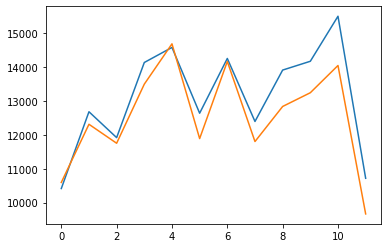

In [59]:
plt.plot(test_data)
plt.plot(testo[-12:])